# Problem Solving with Algorithms and Data Structures using Python
## Chapter 4. Basic Data Structures
### Programming Exercises

## Stack

#### 0. Write a function revstring(mystr) that uses a stack to reverse the characters in a string.

In [37]:
from pythonds.basic import Stack

def revstring1(mystr):
    
    s=Stack()
    reversed_str=''
    for item in mystr[::-1]:
        s.push(item)
        reversed_str+=s.pop()
    return reversed_str


def revstring(mystr):
    s=Stack()
    reversed_str=''
    for item in mystr:
        s.push(item)
        
    while not s.isEmpty():
        reversed_str+=s.pop()
        
    return reversed_str



print(revstring('apple') == revstring1('apple') == 'elppa')
print(revstring('x') == revstring1('x') == 'x')
print(revstring('1234567890') == revstring1('1234567890') == '0987654321')


True
True
True


#### 1.Check if parentheses are balanced with stack(when brackets are only round)

In [115]:
from pythonds.basic import Stack

def check_if_parentheses_balanced(brakets):

    
    s=Stack()  
    balanced = True
    for item in brakets:
        if item=='(':
            s.push(item)
        elif item==')':
            if s.isEmpty():
                balanced = False
            else:
                s.pop()
                
        else:
            return 'not parentheses'
    if balanced and s.isEmpty():
        return True
    else:
        return False

        
input_line1 ='(()'
input_line2 ='(()()))))' 
input_line3 ='(()())))f' 
input_line4 ='(()())' 
print(f'Parentheses {input_line1} are balanced it is {check_if_parentheses_balanced(input_line1)}')
print(f'Parentheses {input_line2} are balanced it is {check_if_parentheses_balanced(input_line2)}')
print(f'Parentheses {input_line3} are balanced it is {check_if_parentheses_balanced(input_line3)}')
print(f'Parentheses {input_line4} are balanced it is {check_if_parentheses_balanced(input_line4)}')

Parentheses (() are balanced it is False
Parentheses (()())))) are balanced it is False
Parentheses (()())))f are balanced it is not parentheses
Parentheses (()()) are balanced it is True


#### 2.Check if brackets are balanced with stack(can use for (), [], and {} brakets)

In [120]:
from pythonds.basic import Stack

def check_brakets(input_brakets):
    s=Stack()
    balanced = True
    for item in input_brakets:
        if item in "([{":
            s.push(item)
        elif item in ")]}":
            if s.isEmpty():
                balanced = False
            else:
                top = s.pop()
                if not check_marche_open_close(top, item):
                    balanced = False
        else: 'Your input consists symbols that are not brakets'
            
    if balanced and s.isEmpty():
        return True
    else: 
        return False
    
    
def check_marche_open_close(openb, closeb):
    opens="([{"
    closes=")]}"
    return opens.index(openb)==closes.index(closeb)


print(check_brakets('{({([][])}())}'))
print(check_brakets('[{()]'))

True
False


#### 3. Coverting decimal numbers to binary(using stacks)

In [7]:
from pythonds.basic import Stack


def convertor(decimal):
    storage=Stack()
    while decimal>1:
        storage.push(decimal%2)
        decimal = decimal//2
    storage.push(decimal)

    binary_str=''
    
    while not storage.isEmpty():

        binary_str+=str(storage.pop())

    return binary_str
        

print('0b'+convertor(233)==bin(233))
print('0b'+convertor(3)==bin(3))
print('0b'+convertor(23)==bin(23))
from pythonds.basic import Stack


def convertor(decimal):
    storage=Stack()
    while decimal>1:
        storage.push(decimal%2)
        decimal = decimal//2
    storage.push(decimal)

    binary_str=''
    
    while not storage.isEmpty():

        binary_str+=str(storage.pop())

    return binary_str
        

print('0b'+convertor(233)==bin(233))
print('0b'+convertor(3)==bin(3))
print('0b'+convertor(23)==bin(23))
print(convertor(17))

True
True
True
True
True
True
10001


#### 4. Coverting decimal numbers to different encodings(using stacks)

In [13]:
from pythonds.basic import Stack


def convertor(decimal, base):
    digits = "0123456789ABCDEF"
    storage=Stack()
    while decimal>=base:
        storage.push(decimal%base)
        decimal = decimal//base
    storage.push(decimal)

    binary_str=''
    
    while not storage.isEmpty():

        binary_str+=str(digits[storage.pop()])

    return binary_str





decimal_number= int(input('Enter decimal number: '))
base= int(input('Enter base of needed encoding: '))
print(convertor(decimal_number,base))



Enter decimal number: 240
Enter base of needed encoding: 16
F0


#### 5. Converting Infix Expressions to Postfix Expressions 

In [37]:
from pythonds.basic import Stack 


def convertor(input_string):
    operators_stack = Stack()
    #result =''
    result = []
    tokenList = input_string.split()
    #for checking precendence
    precendence={}
    precendence['(']=1
    precendence['-']=2
    precendence['+']=2
    precendence['*']=3
    precendence['/']=3
    precendence['^']=4
    
    for item in tokenList:
        if item in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" or item in "01234567891011121314151617181920":
            result.append(item)
        elif item == '(':
               
            operators_stack.push(item)
        elif item == ')':
            top=operators_stack.pop()
            while top !='(':
                result.append(top)
                top = operators_stack.pop()
        else:
            ##check
            #while (not operators_stack.isEmpty()) and \ (precendence[operators_stack.peek()] >= precendence[item]):
            while (not operators_stack.isEmpty()) and \
               (precendence[operators_stack.peek()] >= precendence[item]):

                result.append(operators_stack.pop())
                    
            operators_stack.push(item)  
            
            
    while not operators_stack.isEmpty():
        result.append(operators_stack.pop())
        
    return " ".join(result)
        
        
print(convertor("11 * B + C * D"))


11 B * C D * +


#### 6. Postfix Evaluation (postfixeval) (for numbers from 0 to 20)

In [19]:
from pythonds.basic import Stack


def postfixeval(input_string):
    operand_stack=Stack()

    token_list = input_string.split()

    for token in token_list:
        if token in '012345678901011121314151617181920':
            operand_stack.push(int(token))
        elif token in '+-*/':
            second_operand = operand_stack.pop()
            first_operand = operand_stack.pop()
            result = doMath(token,first_operand,second_operand)
            operand_stack.push(result)
        else:
            raise RuntimeError('In input are need to be only numpers and math operators'+ str(token))

    return operand_stack.pop()


def doMath(token,first_operand,second_operand):
    if token == '+':
        return first_operand + second_operand
    elif token == '-':
        return first_operand - second_operand
    elif token == '*':
        return first_operand * second_operand
    else:
        return first_operand / second_operand
    
    
print(postfixeval('17 10 + 3 * 9 /'))


9.0


## Queue

#### 0. Hot Potato Simulation (qujosephussim)

In [147]:
from pythonds.basic import Queue

def hotPotato(str_players, step):
    queue_players = Queue()
    result = []
    
    for item in str_players:
        queue_players.enqueue(item)
    
    while queue_players.size()>1:
        for i in range(step):    
            queue_players.enqueue(queue_players.dequeue())
        queue_players.dequeue()
    
    return queue_players.dequeue()



print(hotPotato(["Bill","David","Susan","Jane","Kent","Brad"],7))


Susan


## Deque

#### 0. Palindrome-Checker
#### A palindrome is a string that reads the same forward and backward, for example, radar, toot, and madam. We would like to construct an algorithm to input a string of characters and check whether it is a palindrome.

In [15]:
from pythonds.basic import Deque

def palindrome_checker(input_string):
    deque_storage=Deque()
    for character in input_string:
        deque_storage.addRear(character)
    
    is_palindrome = True
    
    while is_palindrome and deque_storage.size()>1:       
        if deque_storage.removeRear() != deque_storage.removeFront():
            is_palindrome = False
            
    return is_palindrome

print(palindrome_checker('lsdkjfskf'))
print(palindrome_checker('radar'))

    

False
True


## Unordered List

#### 0. Implement the append method for UnorderedList. What is the time complexity of the method you created? answer - complexity = O(n)

In [23]:
# Here Unordered List - collection of nodes


class Node:
    def __init__(self, init_data):
        self.data = init_data
        self.next = None
        
    def __repr__(self):
        string=''
        string=str(self.data)
        return string
        
    def get_data(self):
        return self.data
    
    def get_next(self):
        return self.next
    
    def set_data(self, new_data):
        self.data = new_data
        
    def set_next(self, new_next):
        self.next = new_next
        
class UnorderedList:
    def __init__(self):
        self.head = None
        
    def __repr__(self):
        current = self.head
        string = ''
        while current != None:
            string+=str(current)+' '
            current = current.get_next()
            
        return string
        
    def isEmpty(self):
        return self.head == None
    
    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp
        
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count+=1
            current = current.get_next()
            
        return count
    
    def search(self, item):
        is_found = False
        current = self.head
        
        while current != None and (not is_found):
            if current == item:
                is_found = True
            else:
                current = current.get_next()
        return is_found
    
    def remove(self, item):
        is_found = Fasle
        current = self.head
        previous = None
        
        while not is_found:
            if current.get_next == item:
                is_found = True
            else:
                previous = current
                current = current.get_next()
                
                
            if privious == None:
                self.head = current.get_next()
            else:
                previous.set_next(current.get_next())
                
    def append(self, item):
        current = self.head
        previous = None
        while current !=None:
            previous = current
            current = current.get_next()
        
        previous.set_next(Node(item))
        
        
mylist = UnorderedList()
mylist.add(31)
mylist.add(77)
mylist.add(17)
print(mylist)
mylist.append(12)
print(mylist)
mylist.append(100)
print(mylist)


17 77 31 
17 77 31 12 
17 77 31 12 100 


#### 1. Modify your append method to be O(1)

In [41]:
# Here Unordered List - collection of nodes


class Node:
    def __init__(self, init_data):
        self.data = init_data
        self.next = None
        
    def __repr__(self):
        string=''
        string=str(self.data)
        return string
        
    def get_data(self):
        return self.data
    
    def get_next(self):
        return self.next
    
    def set_data(self, new_data):
        self.data = new_data
        
    def set_next(self, new_next):
        self.next = new_next
        
class UnorderedList:
    def __init__(self):
        self.head = None
        self.tail = None
        
    def __repr__(self):
        current = self.head
        string = ''
        while current != None:
            string+=str(current)+' '
            current = current.get_next()
            
        return string
        
    def isEmpty(self):
        return self.head == None
    
    def add(self, item):
        if self.tail == None:
            self.tail = self.head
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp
    
    def get_tail(self):
        return self.tail
        
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count+=1
            current = current.get_next()
            
        return count
    
    def search(self, item):
        is_found = False
        current = self.head
        
        while current != None and (not is_found):
            if current == item:
                is_found = True
            else:
                current = current.get_next()
        return is_found
    
    def remove(self, item):
        is_found = Fasle
        current = self.head
        previous = None
        
        while not is_found:
            if current.get_next == item:
                is_found = True
            else:
                previous = current
                current = current.get_next()
                
                
            if privious == None:
                self.head = current.get_next()
            else:
                previous.set_next(current.get_next())
                
    def append(self, item):
        tail = self.tail
        tail.set_next(Node(item))
    
        
        
mylist = UnorderedList()
mylist.add(31)
mylist.add(77)
mylist.add(17)
print(mylist)
mylist.append(12)
print(mylist)
mylist.append(100)
print(mylist)


17 77 31 
17 77 31 12 
17 77 31 100 


#### The remaining methods append, insert, index, and pop are left as exercises. 


In [9]:
# Here Unordered List - collection of nodes


class Node:
    def __init__(self, init_data):
        self.data = init_data
        self.next = None
        self.pos = 0
    def __repr__(self):
        string=''
        string=str(self.data)
        return string
        
    def get_data(self):
        return self.data
    
    def get_next(self):
        return self.next
    
    def get_pos(self):
        return self.pos
    
    def set_pos(self, pos):
        self.pos = pos
    
    def set_data(self, new_data):
        self.data = new_data
        
    def set_next(self, new_next):
        self.next = new_next
        self.pos +=1
        
class UnorderedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.indexx=0
        
    def __repr__(self):
        current = self.head
        string = ''
        while current != None:
            string+=str(current)+' '
            current = current.get_next()
            
        return string
        
    def isEmpty(self):
        return self.head == None
    
    def add(self, item):
        if self.tail == None:
            self.tail = self.head  
        
        temp = Node(item)
        temp.set_next(self.head)

        temp.set_pos(self.indexx)
        self.head = temp
        self.indexx+=1
        
    
    def get_tail(self):
        return self.tail
    

        
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count+=1
            current = current.get_next()
            
        return count
    
    def search(self, item):
        is_found = False
        current = self.head
        
        while current != None and (not is_found):
            if current.get_data() == item:
                is_found = True
            else:
                current = current.get_next()
        return is_found
    
    def remove(self, item):
        is_found = False
        current = self.head
        previous = None
        
        while not is_found:
            if current.get_data() == item:
                is_found = True
            else:
                previous = current
                current = current.get_next()
                
                
        if previous == None:
                self.head = current.get_next()
        else:
                previous.set_next(current.get_next())
                
        #print(previous,current)
        
                
    def append(self, item):
        tail = self.tail
        tail.set_next(Node(item))
        
    def index(self,item):
        current = self.head
        is_found = False
        index = None
        while current != None and (not is_found):
            if current.get_data() == item:
                index = current.get_pos()
                is_found = True
                
            else:
                current = current.get_next()
        return index        
    
    def pop(self, indexx=0):
        is_found = False
        current = self.head
        previous = None
#         while current != None and (not is_found):
#             if current.get_pos() == indexx:
#                 is_found = True
#             else:
#                 previous = current
#                 current = current.get_next()
                
                
        if previous == None:
                self.head = current.get_next()
        else:
                previous.set_next(current.get_next())  

                
                
        
            
            
        

        
mylist = UnorderedList()
mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(62)
mylist.add(9)
#print(mylist)


#print(mylist.index(31))
# print(mylist.get_pos_of_item(77))
# print(mylist.get_pos_of_item(17))
# print(mylist.get_pos_of_item(62))
# print(mylist.get_pos_of_item(9))


#print(mylist.search(77))


# mylist.append(12)
# print(mylist)
mylist.append(100)
print(mylist)
#print(mylist.index(100))
#print(mylist.index(31))
# print(mylist.get_pos_of_item(100))
# print(mylist.size())

#print(mylist.index(31))
mylist.pop()
print(mylist)
#print(mylist.index(31))
mylist.pop()
#mylist.remove(31)
print(mylist)

9 62 17 77 31 100 
62 17 77 31 100 
17 77 31 100 


#### 1. Implement a direct infix evaluator that combines the functionality of infix-to-postfix conversion and the postfix evaluation algorithm. 

In [52]:
from pythonds.basic import Stack 


def convertor(input_string):
    operators_stack = Stack()
    #result =''
    result = []
    tokenList = input_string.split()
    #for checking precendence
    precendence={}
    precendence['(']=1
    precendence['-']=2
    precendence['+']=2
    precendence['*']=3
    precendence['/']=3
    precendence['^']=4
    
    for item in tokenList:
        if item in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" or item in "01234567891011121314151617181920":
            result.append(item)
        elif item == '(':
               
            operators_stack.push(item)
        elif item == ')':
            top=operators_stack.pop()
            while top !='(':
                result.append(top)
                top = operators_stack.pop()
        elif item in "+-*/":
            ##check
            #while (not operators_stack.isEmpty()) and \ (precendence[operators_stack.peek()] >= precendence[item]):
            while (not operators_stack.isEmpty()) and \
               (precendence[operators_stack.peek()] >= precendence[item]):

                result.append(operators_stack.pop())
                    
            operators_stack.push(item)  
            
            
    while not operators_stack.isEmpty():
        result.append(operators_stack.pop())
        
    return " ".join(result)
        
        

def postfixeval(input_string):
    operand_stack=Stack()

    token_list = input_string.split()

    for token in token_list:
        if token in '012345678901011121314151617181920':
            operand_stack.push(int(token))
        elif token in '+-*/':
            second_operand = operand_stack.pop()
            first_operand = operand_stack.pop()
            result = doMath(token,first_operand,second_operand)
            operand_stack.push(result)
        else:
            raise RuntimeError('In input are need to be only numpers and math operators'+ str(token))

    return operand_stack.pop()


def doMath(token,first_operand,second_operand):
    if token == '+':
        return first_operand + second_operand
    elif token == '-':
        return first_operand - second_operand
    elif token == '*':
        return first_operand * second_operand
    else:
        return first_operand / second_operand


def directInfixEvaluator(infix):
    return postfixeval(convertor(infix))
    

print(directInfixEvaluator('( 17 + 10 ) * 3 / 9'))


9.0


#### 2. Implement the Queue ADT, using a list such that the rear of the queue is at the end of the list.

In [69]:
class Queue:
    def __init__(self):
        self.items = []
        
    def __repr__(self): 
        return str(self.items)
     
    def enqueue(self, item):
        self.items.append(item)
    
    def dequeue(self):
        rear = self.items.pop(0)
        
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)
        
        
myQueue = Queue()
print(myQueue.isEmpty())
print(myQueue.size())
myQueue.enqueue(5)
myQueue.enqueue(8)
myQueue.enqueue(10)
print(myQueue.size())
print(myQueue)
myQueue.dequeue()
print(myQueue)
print(myQueue.isEmpty())

True
0
3
[5, 8, 10]
[8, 10]
False


#### 3. Design and implement an experiment to do benchmark comparisons of the two queue implementations. What can you learn from such an experiment?

In [1]:
from timeit import Timer
import matplotlib.pyplot as plt

# The implementation assumes that the rear is at position 0 in the list.
class Queue1:
    def __init__(self):
        self.items = []
        
    def __repr__(self): 
        return str(self.items)

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)
    
    
# The implementation assumes  that the rear of the queue is at the end of the list.

class Queue2:
    def __init__(self):
        self.items = []
        
    def __repr__(self): 
        return str(self.items)
     
    def enqueue(self, item):
        self.items.append(item)
    
    def dequeue(self):
        rear = self.items.pop(0)
        
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)

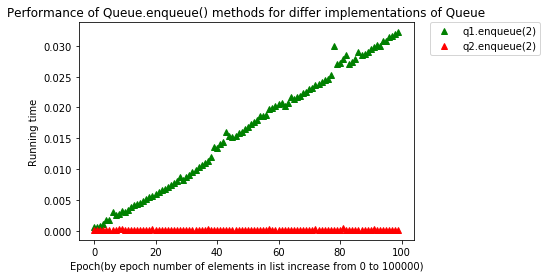

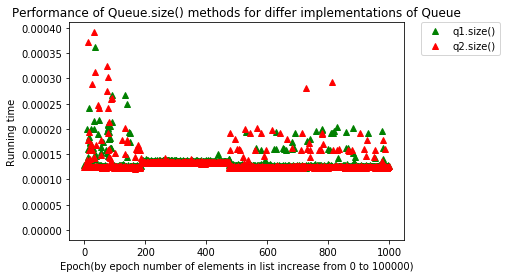

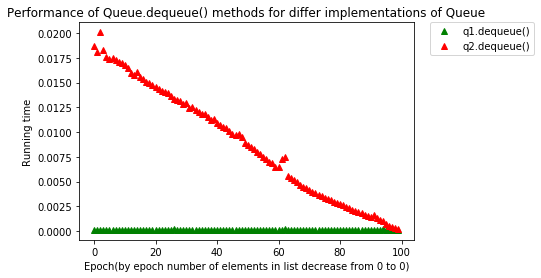

In [176]:
import matplotlib.pyplot as plt
import random 

q1 = Queue1()
q2 = Queue2()
time1 =[]
time2 =[]

for i in range(100):
    x = random.randrange(10)
    t1 = Timer("q1.enqueue(x)", globals=globals())
    time1.append(t1.timeit(number=1000))
    
    t2 = Timer("q2.enqueue(x)", globals=globals())
    time2.append(t2.timeit(number=1000))
    

plt.plot(time1, 'g^', label="q1.enqueue(2)")
plt.plot(time2, 'r^', label="q2.enqueue(2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch(by epoch number of elements in list increase from 0 to {q1.size()})')
plt.title('Performance of Queue.enqueue() methods for differ implementations of Queue')
plt.ylabel('Running time')

plt.show()

time1 =[]
time2 =[]

for i in range(1000):
    x = random.randrange(10)
    t1 = Timer("q1.size()", globals=globals())
    time1.append(t1.timeit(number=1000))
    
    t2 = Timer("q2.size()", globals=globals())
    time2.append(t2.timeit(number=1000))
    
plt.plot(0, "b-")
plt.plot(time1, 'g^', label="q1.size()")
plt.plot(time2, 'r^', label="q2.size()")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch(by epoch number of elements in list increase from 0 to {q1.size()})')
plt.title('Performance of Queue.size() methods for differ implementations of Queue')
plt.ylabel('Running time')

plt.show()


time1 =[]
time2 =[]

for i in range(100):
    x = random.randrange(10)
    t1 = Timer("q1.dequeue()", globals=globals())
    time1.append(t1.timeit(number=1000))
    
    t2 = Timer("q2.dequeue()", globals=globals())
    time2.append(t2.timeit(number=1000))
    

plt.plot(time1, 'g^', label="q1.dequeue()")
plt.plot(time2, 'r^', label="q2.dequeue()")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch(by epoch number of elements in list decrease from 0 to {q1.size()})')
plt.title('Performance of Queue.dequeue() methods for differ implementations of Queue')
plt.ylabel('Running time')

plt.show()




#### It is possible to implement a queue such that both enqueue and dequeue have O(1) performance on average. In this case it means that most of the time enqueue and dequeue will be O(1) except in one particular circumstance where dequeue will be O(n).



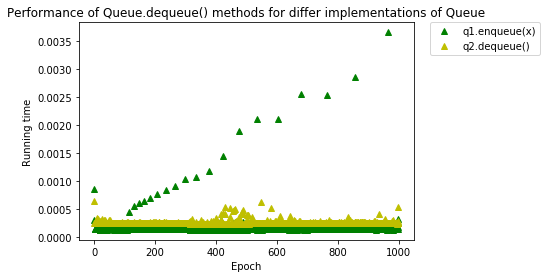

In [212]:
class Queue3:
    def __init__(self):
        self.items = []
        self.end = 0
    
    def enqueue(self, item):
        self.items.append(item)
    
    def dequeue(self):
        item = self.items[self.end]
        self.items[self.end] = None
        self.end += 1
        return item

    def size(self):
        return len(self.items) - self.end
    
    def is_empty(self):
        if self.items[-1] is None:
            return True
        else:
            return False

        
time1 =[]
time2 =[]
q3 = Queue3()
for i in range(1000):
    x = random.randrange(10)
    t1 = Timer("q3.enqueue(x)", globals=globals())
    time1.append(t1.timeit(number=1000))
    #print(i, t1.timeit(number=1000))
    t2 = Timer("q3.dequeue()", globals=globals())
    time2.append(t2.timeit(number=1000))

plt.plot(time1, 'g^', label="q1.enqueue(x)")
plt.plot(time2, 'y^', label="q2.dequeue()")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch')
plt.title('Performance of Queue.dequeue() methods for differ implementations of Queue')
plt.ylabel('Running time')

plt.show()     

### 4. Simulation: A bank teller

###### To model this situation we need to use some probabilities. For example, clients may ask to do one operation from 20 possible operations. We assume that from order number of operation rises time for processing this operation. If each operation from 1 to 20 is equally likely, the actual length for a operating task can be simulated by using a random number between 1 and 20 inclusive. This means that there is equal chance of any operation from 1 to 20 appearing. 

#### If there are 10 clients in the bank and each ask for 2 operation, then there are 20 operation tasks per hour on average. What is the chance that at any given second, a print task is going to be created? The way to answer this is to consider the ratio of tasks to time. Twenty tasks per hour means that on average there will be one task every 180 seconds.

#### For every second we can simulate the chance that a operation task occurs by generating a random number between 1 and 180 inclusive. If the number is 180, we say a task has been created. Note that it is possible that many tasks could be created in a row or we may wait quite a while for a task to appear. That is the nature of simulation. You want to simulate the real situation as closely as possible given that you know general parameters.

In [12]:
import random
from pythonds.basic import Queue

class BankTeller:
    def __init__(self, oppermin):
        self.operationsrate = oppermin
        self.current_task = None
        self.time_remaining = 0
        
    def tick(self):
        if self.time_remaining !=0:
            self.time_remaining -=1
            if self.time_remaining<=0:
                self.current_task = None
                
    def busy(self):
        if self.current_task != None:
            return True
        else:
            return False
        
    def start_next(self, new_task):
        self.current_task = new_task
        self.time_remaining = new_task.get_operation()*60/self.operationsrate
        

class Operation:
    def __init__(self, time):
        self.timestamp = time
        self.operation = random.randrange(1,21)

    def get_timestamp(self):
        return self.timestamp
    
    def get_operation(self):
        return self.operation
    
    def wait_time(self, currenttime):
        return currenttime - self.timestamp
    
    
    
def simulation(num_seconds, task_per_minute):

    bank_teller = BankTeller(task_per_minute)
    taskQueue = Queue()
    waiting_times = []

    for current_second in range(num_seconds):

      if new_task():
         operation = Operation(current_second)
         taskQueue.enqueue(operation)

      if (not bank_teller.busy()) and (not taskQueue.isEmpty()):
        nexttask = taskQueue.dequeue()
        waiting_times.append(nexttask.wait_time(current_second))
        bank_teller.start_next(nexttask)

      bank_teller.tick()

    average_wait=sum(waiting_times)/len(waiting_times)
    print("Average Wait %6.2f secs %3d tasks remaining."%(average_wait,taskQueue.size()))

def new_task():
    num = random.randrange(1,181)
    if num == 180:
        return True
    else:
        return False

for i in range(10):
    simulation(3600,6)
            

Average Wait  96.10 secs   0 tasks remaining.
Average Wait  30.17 secs   0 tasks remaining.
Average Wait  40.78 secs   0 tasks remaining.
Average Wait  41.21 secs   1 tasks remaining.
Average Wait  30.07 secs   0 tasks remaining.
Average Wait  46.26 secs   0 tasks remaining.
Average Wait  84.68 secs   0 tasks remaining.
Average Wait 103.84 secs   0 tasks remaining.
Average Wait  11.64 secs   0 tasks remaining.
Average Wait  64.18 secs   1 tasks remaining.


### 5. Modify the Hot Potato simulation to allow for a randomly chosen counting value so that each pass is not predictable from the previous one.

In [38]:
from pythonds.basic import Queue
import random

def hotPotato(str_players, step):
    queue_players = Queue()
    result = []
    
    for item in str_players:
        queue_players.enqueue(item)
    
    while queue_players.size()>1:
        for i in range(step):
            player_with_potato = queue_players.dequeue()
            queue_players.enqueue(player_with_potato)
        queue_players.dequeue()

        
    return queue_players.dequeue()


print(hotPotato(["Bill","David","Susan"],random.randrange(1,21)))


David


### 6. Implement a radix sorting machine. 


In [187]:
from pythonds.basic import Queue
class myQueue(Queue):
    def __repr__(self): 
        return str(self.items)
    
    

def sort_by_rate(input_list, digit):
    
    #digit- maximum digit of numbers in input_list
    
    for rate in range(1,int(digit)+1):


        queque_nums = myQueue()
        list_units0 = []
        list_units1 = []
        list_units2 = []
        list_units3 = []
        list_units4 = []
        list_units5 = []
        list_units6 = []
        list_units7 = []
        list_units8 = []
        list_units9= []
        dict_bins = {
            0: list_units0,
            1: list_units1,
            2: list_units2,
            3: list_units3,
            4: list_units4,
            5: list_units5,
            6: list_units6,
            7: list_units7,
            8: list_units8,
            9: list_units9
        }


        for item in input_list:
            queque_nums.enqueue(item)
            item = str(item)
            unit =int(item[-rate] if len(item)>=rate else 0)

            if unit == 0:
                list_units0.append(item)
            elif unit == 1:
                list_units1.append(item)
            elif unit == 2:
                list_units2.append(item)
            elif unit == 3:
                list_units3.append(item)
            elif unit == 4:
                list_units4.append(item)
            elif unit == 5:
                list_units5.append(item)
            elif unit == 6:
                list_units6.append(item)
            elif unit == 7:
                list_units7.append(item)
            elif unit == 8:
                list_units8.append(item)
            elif unit == 9: 
                list_units9.append(item)


        list_list = []
        for i in range(10):
            for item in dict_bins[i]:
                list_list.append(int(item))
        input_list = list_list
    return input_list
    
    
    
test_list1 = [4, 32, 74, 46, 242, 14, 122, 2]  
print(sort_by_rate(test_list1,3))

test_list2 = [1, 41, 724, 9120, 8002, 140, 2, 6, 82, 49, 456, 3]
print(sort_by_rate(test_list2,4))

[2, 4, 14, 32, 46, 74, 122, 242]
[1, 2, 3, 6, 41, 49, 82, 140, 456, 724, 8002, 9120]
